# Project Brief: Marketing Mix Modeling for Digital Advertising  
**Author:** Olaoluwa J. Taiwo  

## Title  
Evaluating the Impact of Digital Marketing Channels on Sales Performance: A Marketing Mix Modeling Approach  

## Background  
In today’s competitive business environment, understanding how different marketing channels contribute to sales is essential for optimising advertising budgets. Marketing Mix Modeling (MMM) provides a quantitative framework to assess the effectiveness of various channels by linking marketing spend to sales outcomes.  

The provided dataset spans 200 weeks, containing information on advertising investments across three digital channels **TikTok, Facebook, and Google Ads** along with corresponding **sales figures**.  

## Aim  
To develop a Marketing Mix Model that quantifies the contribution of TikTok, Facebook, and Google Ads to sales, thereby guiding data-driven budget allocation decisions.  

## Objectives  
1. **Data Exploration & Cleaning**  
   - Understand the structure and trends of marketing spend and sales.  
   - Ensure data consistency and prepare variables for modeling.  

2. **Channel Contribution Analysis**  
   - Estimate the relative impact of TikTok, Facebook, and Google Ads on sales.  
   - Identify diminishing returns or saturation effects.  

3. **Model Development**  
   - Build a regression-based MMM to quantify channel elasticity.  
   - Validate the model using statistical tests and predictive accuracy.  

4. **Optimization & Scenario Planning**  
   - Simulate budget reallocation scenarios to maximize sales.  
   - Provide actionable recommendations on optimal spend distribution across channels.  

5. **Insights & Recommendations**  
   - Summarize key findings on which channels drive the highest ROI.  
   - Offer strategic guidance for future marketing investments.  


# 1. Data Exploration & Cleaning

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r"C:\Users\taiwo\Downloads\marketing_mix.csv", parse_dates=["Date"])

# Set Date as index for time series handling
data = data.set_index("Date")

print(data.head())

             TikTok  Facebook  Google Ads     Sales
Date                                               
2018-01-07  13528.1      0.00        0.00   9779.80
2018-01-14      0.0   5349.65     2218.93  13245.19
2018-01-21      0.0   4235.86     2046.96  12022.66
2018-01-28      0.0   3562.21        0.00   8846.95
2018-02-04      0.0      0.00     2187.29   9797.07


In [89]:
data.info()
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 200 entries, 2018-01-07 to 2021-10-31
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TikTok      200 non-null    float64
 1   Facebook    200 non-null    float64
 2   Google Ads  200 non-null    float64
 3   Sales       200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB
             TikTok     Facebook   Google Ads         Sales
count    200.000000   200.000000   200.000000    200.000000
mean    2946.207650  2213.585050  1520.722550  10668.141500
std     4749.646908  2505.967886   870.764354   2700.706683
min        0.000000     0.000000     0.000000   4532.330000
25%        0.000000     0.000000  1657.195000   8396.942500
50%        0.000000     0.000000  1918.990000  10853.105000
75%     7938.527500  4624.027500  2069.767500  12566.995000
max    13901.550000  7696.220000  2518.880000  17668.340000


Sales data (2018–2021) show strong variability influenced by digital ad spend. TikTok spend is highly volatile with large peaks, while Facebook and Google Ads are more stable. Sales average 10.7K, ranging from 4.5K–17.6K. Higher ad investments, particularly in TikTok and Google Ads, correlate with stronger sales performance.

In [90]:
print("\nMissing Values Check:")
print(data.isnull().sum())


Missing Values Check:
TikTok        0
Facebook      0
Google Ads    0
Sales         0
dtype: int64


# 2. Channel Contribution Analysis

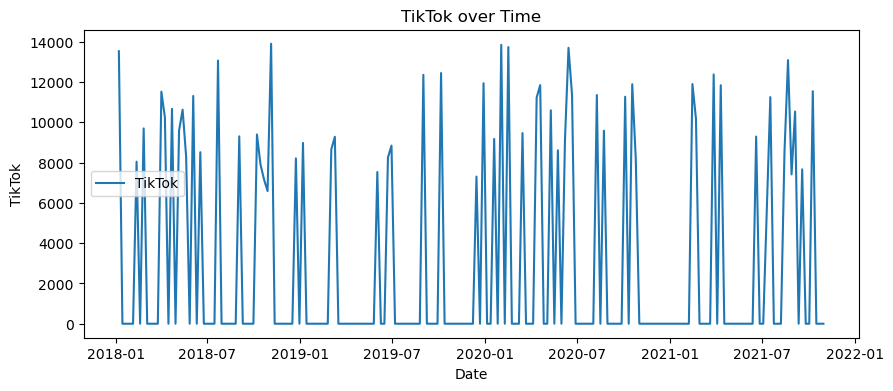

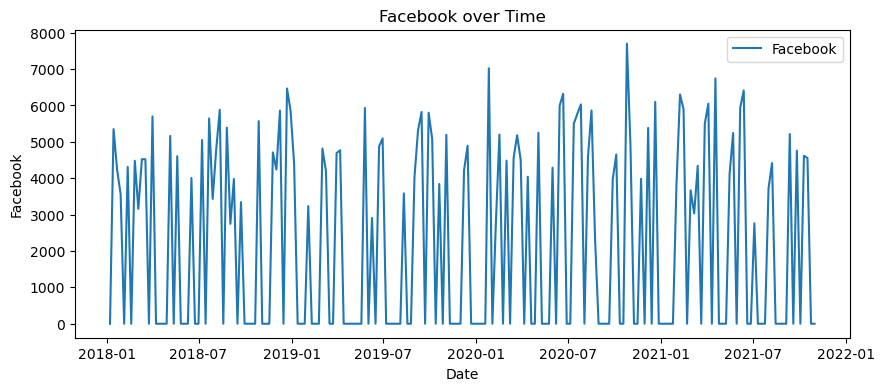

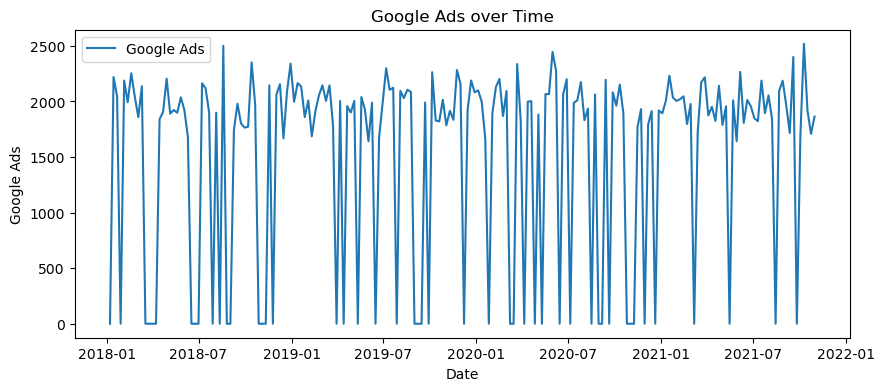

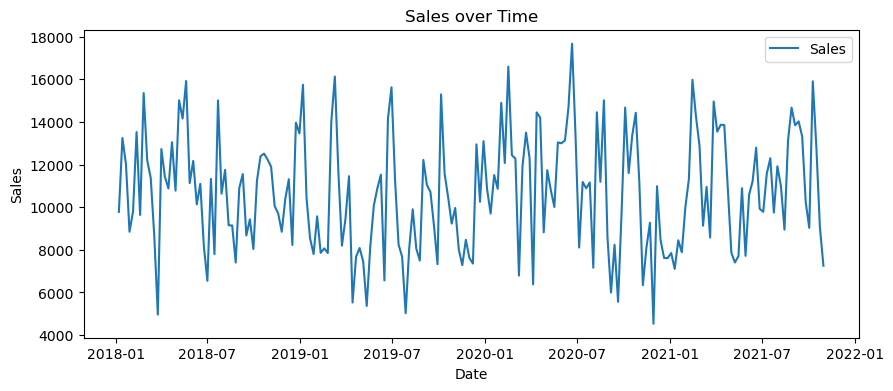

In [91]:
#Time series overview

for col in data.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(data.index, data[col], label=col)
    plt.title(f"{col} over Time")
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.legend()
    plt.show()

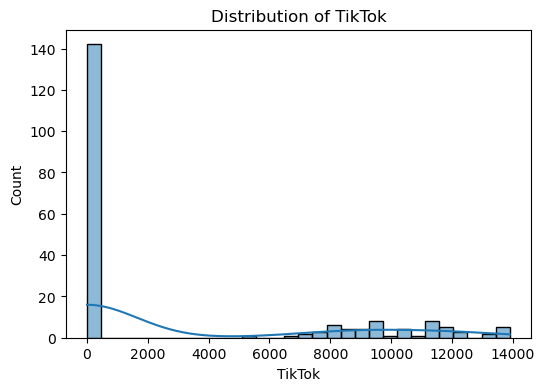

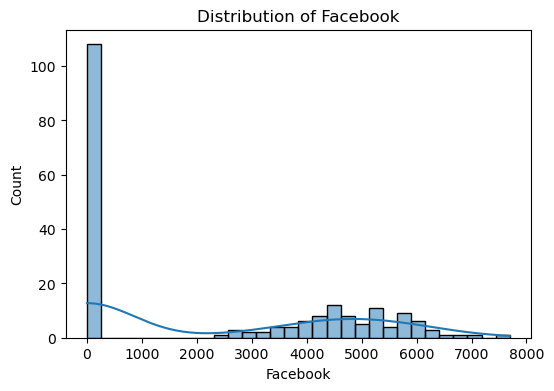

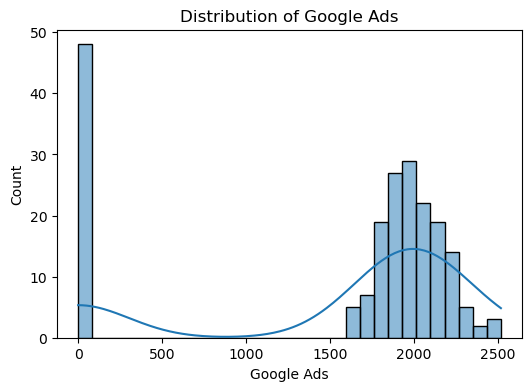

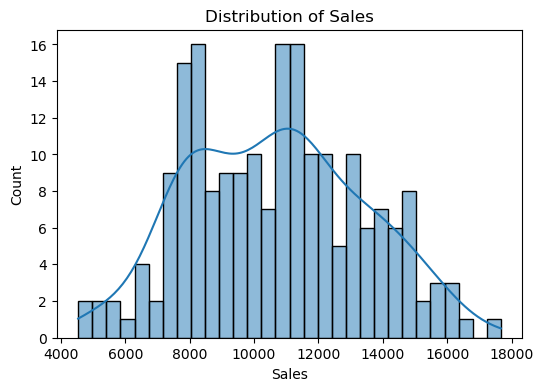

In [92]:
# Distributions

for col in data.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

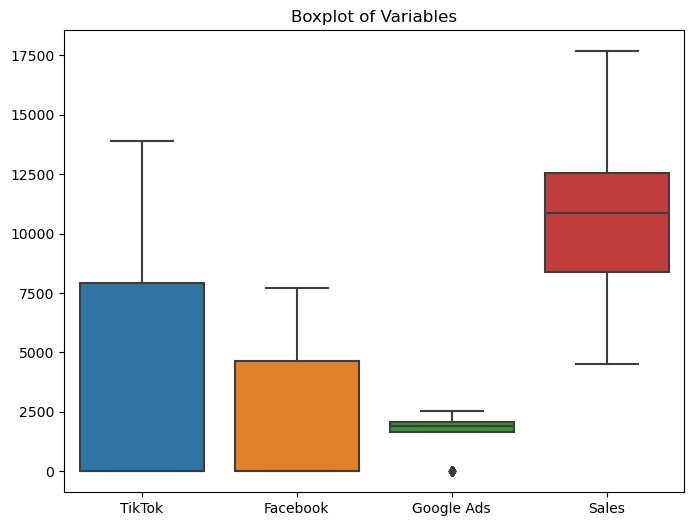

In [93]:
# Boxplots (outlier detection)

plt.figure(figsize=(8, 6))
sns.boxplot(data=data)
plt.title("Boxplot of Variables")
plt.show()

The boxplot shows significant variation across ad platforms. TikTok spend is highly skewed with large fluctuations, while Facebook spend is moderate but also variable. Google Ads spend is more stable with fewer outliers. Sales display a wide range, suggesting ad spend volatility especially TikTok closely influences sales performance and peaks.


Correlation Matrix:
              TikTok  Facebook  Google Ads     Sales
TikTok      1.000000  0.084128    0.021735  0.679205
Facebook    0.084128  1.000000   -0.100946  0.466762
Google Ads  0.021735 -0.100946    1.000000  0.360046
Sales       0.679205  0.466762    0.360046  1.000000


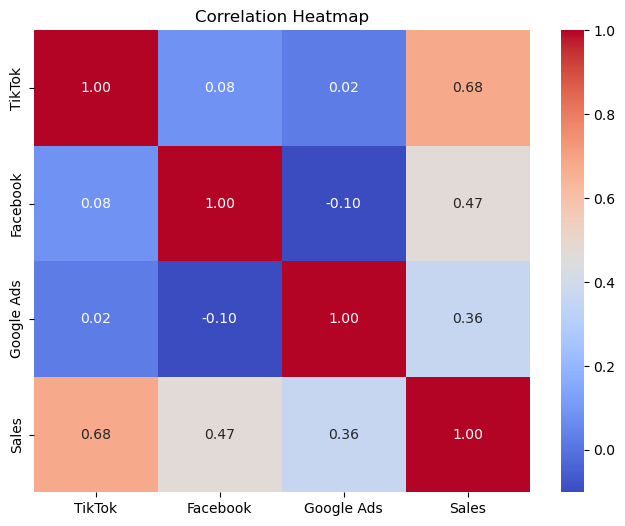

In [94]:
# Correlation analysis

corr = data.corr()
print("\nCorrelation Matrix:")
print(corr)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

The correlation heatmap shows TikTok spend has the strongest positive relationship with sales (0.68), followed by Facebook (0.47) and Google Ads (0.36). TikTok stands out as the most influential channel. Weak or negative correlations between ad platforms suggest they act independently rather than substituting one another in driving sales.

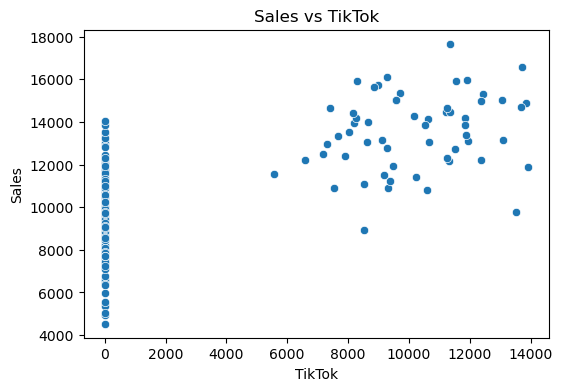

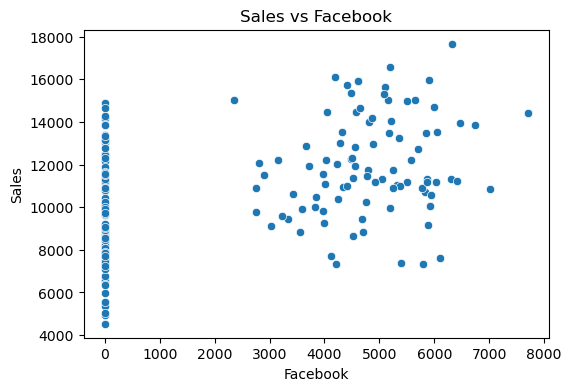

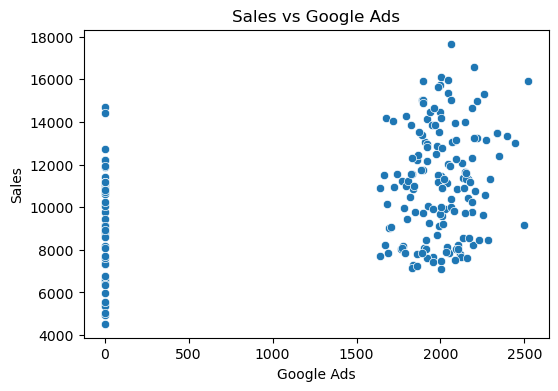

In [95]:
# Scatter plots (relationships)

for col in ["TikTok", "Facebook", "Google Ads"]:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=data[col], y=data["Sales"])
    plt.title(f"Sales vs {col}")
    plt.xlabel(col)
    plt.ylabel("Sales")
    plt.show()

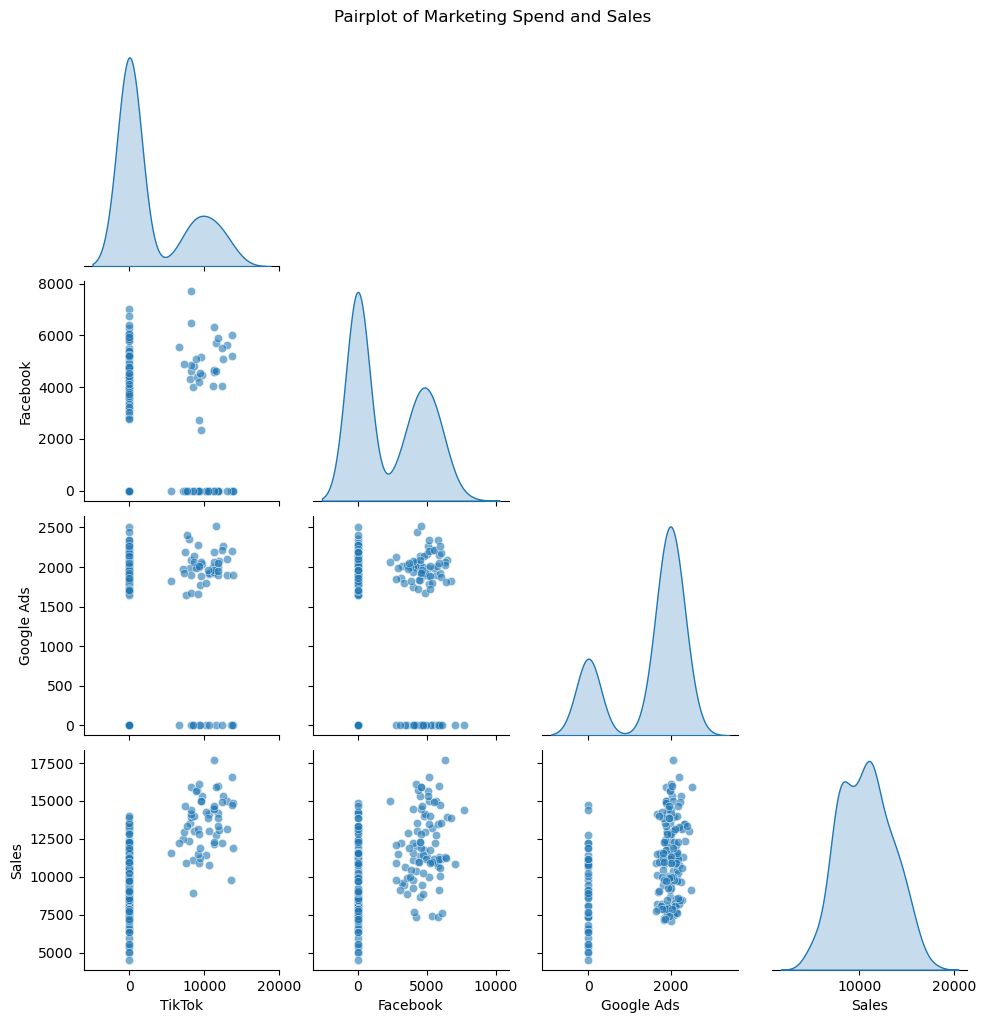

In [96]:
sns.pairplot(data, diag_kind="kde", corner=True, plot_kws={'alpha':0.6})
plt.suptitle("Pairplot of Marketing Spend and Sales", y=1.02)
plt.show()

The pairplot shows clear positive relationships between ad spend and sales, with TikTok displaying the strongest upward trend, followed by Facebook and Google Ads. Distributions reveal that TikTok and Facebook spends are often zero but produce high sales when invested. This confirms digital ad campaigns significantly boost sales outcomes.

# 3. Feature Engineering

In [97]:
# 1. Adstock Transformation

# let apply adstock because advertising has a "carryover effect" —
# meaning the impact of spend this week may influence sales in future weeks.
def adstock(series, alpha=0.5):
    """Apply adstock transformation with decay factor alpha."""
    result = []
    prev = 0
    for x in series:
        val = x + alpha * prev
        result.append(val)
        prev = val
    return np.array(result)

data["TikTok_adstock"] = adstock(data["TikTok"], alpha=0.5)
data["Facebook_adstock"] = adstock(data["Facebook"], alpha=0.5)
data["GoogleAds_adstock"] = adstock(data["Google Ads"], alpha=0.5)
data.head()

,TikTok,Facebook,Google Ads,Sales,TikTok_adstock,Facebook_adstock,GoogleAds_adstock
Date,,,,,,,
2018-01-07,13528.1,0.00,0.00,9779.80,13528.10000,0.00000,0.00000
2018-01-14,0.0,5349.65,2218.93,13245.19,6764.05000,5349.65000,2218.93000
2018-01-21,0.0,4235.86,2046.96,12022.66,3382.02500,6910.68500,3156.42500
2018-01-28,0.0,3562.21,0.00,8846.95,1691.01250,7017.55250,1578.21250
2018-02-04,0.0,0.00,2187.29,9797.07,845.50625,3508.77625,2976.39625


In this step, I applied the Adstock transformation to TikTok, Facebook, and Google Ads spend. Advertising does not influence sales only in the week it is shown; its impact carries over into future weeks as customers recall or act on campaigns later. The Adstock model captures this carryover effect by allowing part of the previous week’s impact to persist, controlled by a decay factor (α = 0.5 here, meaning 50% of last week’s effect remains). This creates more realistic features for modeling, improves forecast accuracy, and better reflects how marketing spend truly drives sales over time.

In [98]:
# 2. Log Transformation
# ---------------------
# I take the log of spends and sales to capture "diminishing returns".
# In reality, doubling spend does not always double sales — the effect is concave.
for col in ["TikTok", "Facebook", "Google Ads", "Sales"]:
    data[col + "_log"] = np.log1p(data[col])  # log(1+x) avoids issues with zero values
data.head()

,TikTok,Facebook,Google Ads,Sales,TikTok_adstock,Facebook_adstock,GoogleAds_adstock,TikTok_log,Facebook_log,Google Ads_log,Sales_log
Date,,,,,,,,,,,
2018-01-07,13528.1,0.00,0.00,9779.80,13528.10000,0.00000,0.00000,9.512598,0.000000,0.000000,9.188177
2018-01-14,0.0,5349.65,2218.93,13245.19,6764.05000,5349.65000,2218.93000,0.000000,8.584973,7.705231,9.491465
2018-01-21,0.0,4235.86,2046.96,12022.66,3382.02500,6910.68500,3156.42500,0.000000,8.351578,7.624599,9.394632
2018-01-28,0.0,3562.21,0.00,8846.95,1691.01250,7017.55250,1578.21250,0.000000,8.178417,0.000000,9.087941
2018-02-04,0.0,0.00,2187.29,9797.07,845.50625,3508.77625,2976.39625,0.000000,0.000000,7.690876,9.189941


In this step, I applied a log transformation to TikTok, Facebook, Google Ads, and Sales. Marketing spend often shows diminishing returns: doubling spend rarely doubles sales, as the response curve is concave. A log scale helps capture this reality by compressing large values and highlighting relative rather than absolute changes. Using log(1+x) ensures we can handle zero values without errors. This transformation makes relationships between ad spend and sales more linear, stabilizes variance, and improves model interpretability. Ultimately, it aligns the data with economic intuition, leading to more accurate and realistic forecasting results.

In [99]:
# 4. Moving Averages
# ------------------
# I calculate moving averages to smooth out short-term noise.
# This helps reveal medium-term trends in spend and sales.
window = 4  # ~1 month if weekly data
for col in ["TikTok", "Facebook", "Google Ads", "Sales"]:
    data[col + "_MA"] = data[col].rolling(window=window).mean()
    
data.head()

,TikTok,Facebook,Google Ads,Sales,TikTok_adstock,Facebook_adstock,GoogleAds_adstock,TikTok_log,Facebook_log,Google Ads_log,Sales_log,TikTok_MA,Facebook_MA,Google Ads_MA,Sales_MA
Date,,,,,,,,,,,,,,,
2018-01-07,13528.1,0.00,0.00,9779.80,13528.10000,0.00000,0.00000,9.512598,0.000000,0.000000,9.188177,NaN,NaN,NaN,NaN
2018-01-14,0.0,5349.65,2218.93,13245.19,6764.05000,5349.65000,2218.93000,0.000000,8.584973,7.705231,9.491465,NaN,NaN,NaN,NaN
2018-01-21,0.0,4235.86,2046.96,12022.66,3382.02500,6910.68500,3156.42500,0.000000,8.351578,7.624599,9.394632,NaN,NaN,NaN,NaN
2018-01-28,0.0,3562.21,0.00,8846.95,1691.01250,7017.55250,1578.21250,0.000000,8.178417,0.000000,9.087941,3382.025,3286.93,1066.4725,10973.6500
2018-02-04,0.0,0.00,2187.29,9797.07,845.50625,3508.77625,2976.39625,0.000000,0.000000,7.690876,9.189941,0.000,3286.93,1613.2950,10977.9675


To smooth short-term fluctuations, I computed moving averages (MA) for TikTok, Facebook, Google Ads, and Sales using a 4-week rolling window (about one month). Marketing and sales data often contain weekly noise caused by small campaign shifts, seasonality, or outliers. By averaging across consecutive weeks, moving averages highlight the underlying medium-term trends and make patterns more visible. This helps reduce volatility, stabilize the input features, and improve model robustness. Including moving averages in the dataset allows the forecasting model to capture both immediate effects and broader trends, leading to more reliable insights for sales prediction and budget planning.

In [100]:
# 5. Seasonality Features
# -----------------------
# I create calendar-based features because marketing and sales often follow seasonal patterns
# (e.g., Q4 holiday spending boosts sales, January dips).
data["month"] = data.index.month
data["quarter"] = data.index.quarter
data["year"] = data.index.year
data.head()

,TikTok,Facebook,Google Ads,Sales,TikTok_adstock,Facebook_adstock,GoogleAds_adstock,TikTok_log,Facebook_log,Google Ads_log,Sales_log,TikTok_MA,Facebook_MA,Google Ads_MA,Sales_MA,month,quarter,year
Date,,,,,,,,,,,,,,,,,,
2018-01-07,13528.1,0.00,0.00,9779.80,13528.10000,0.00000,0.00000,9.512598,0.000000,0.000000,9.188177,NaN,NaN,NaN,NaN,1,1,2018
2018-01-14,0.0,5349.65,2218.93,13245.19,6764.05000,5349.65000,2218.93000,0.000000,8.584973,7.705231,9.491465,NaN,NaN,NaN,NaN,1,1,2018
2018-01-21,0.0,4235.86,2046.96,12022.66,3382.02500,6910.68500,3156.42500,0.000000,8.351578,7.624599,9.394632,NaN,NaN,NaN,NaN,1,1,2018
2018-01-28,0.0,3562.21,0.00,8846.95,1691.01250,7017.55250,1578.21250,0.000000,8.178417,0.000000,9.087941,3382.025,3286.93,1066.4725,10973.6500,1,1,2018
2018-02-04,0.0,0.00,2187.29,9797.07,845.50625,3508.77625,2976.39625,0.000000,0.000000,7.690876,9.189941,0.000,3286.93,1613.2950,10977.9675,2,1,2018


In [101]:
# I also encode months cyclically (using sine/cosine) so that December and January are close together.
data["month_sin"] = np.sin(2 * np.pi * data.index.month / 12)
data["month_cos"] = np.cos(2 * np.pi * data.index.month / 12)

In [102]:
# 6. Spend Shares
# I compute spend shares to understand the relative importance of each channel
# compared to the total marketing budget in a given week.
data["total_spend"] = data["TikTok"] + data["Facebook"] + data["Google Ads"]

for col in ["TikTok", "Facebook", "Google Ads"]:
    data[col + "_share"] = data[col] / data["total_spend"].replace(0, np.nan)

In [103]:
data.head()

,TikTok,Facebook,Google Ads,Sales,TikTok_adstock,Facebook_adstock,GoogleAds_adstock,TikTok_log,Facebook_log,Google Ads_log,...,Sales_MA,month,quarter,year,month_sin,month_cos,total_spend,TikTok_share,Facebook_share,Google Ads_share
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-07,13528.1,0.00,0.00,9779.80,13528.10000,0.00000,0.00000,9.512598,0.000000,0.000000,...,NaN,1,1,2018,0.500000,0.866025,13528.10,1.0,0.000000,0.000000
2018-01-14,0.0,5349.65,2218.93,13245.19,6764.05000,5349.65000,2218.93000,0.000000,8.584973,7.705231,...,NaN,1,1,2018,0.500000,0.866025,7568.58,0.0,0.706823,0.293177
2018-01-21,0.0,4235.86,2046.96,12022.66,3382.02500,6910.68500,3156.42500,0.000000,8.351578,7.624599,...,NaN,1,1,2018,0.500000,0.866025,6282.82,0.0,0.674197,0.325803
2018-01-28,0.0,3562.21,0.00,8846.95,1691.01250,7017.55250,1578.21250,0.000000,8.178417,0.000000,...,10973.6500,1,1,2018,0.500000,0.866025,3562.21,0.0,1.000000,0.000000
2018-02-04,0.0,0.00,2187.29,9797.07,845.50625,3508.77625,2976.39625,0.000000,0.000000,7.690876,...,10977.9675,2,1,2018,0.866025,0.500000,2187.29,0.0,0.000000,1.000000


In [104]:
data.columns

Index(['TikTok', 'Facebook', 'Google Ads', 'Sales', 'TikTok_adstock',
       'Facebook_adstock', 'GoogleAds_adstock', 'TikTok_log', 'Facebook_log',
       'Google Ads_log', 'Sales_log', 'TikTok_MA', 'Facebook_MA',
       'Google Ads_MA', 'Sales_MA', 'month', 'quarter', 'year', 'month_sin',
       'month_cos', 'total_spend', 'TikTok_share', 'Facebook_share',
       'Google Ads_share'],
      dtype='object')

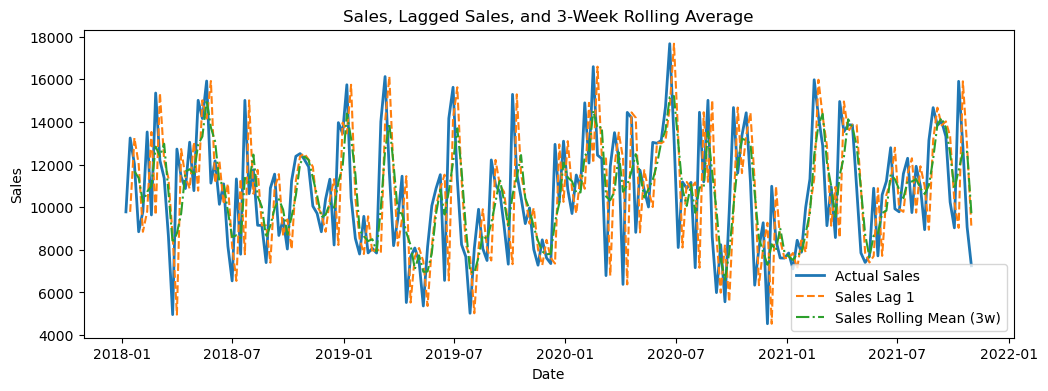

In [105]:
import matplotlib.pyplot as plt

# First, I create the lag and rolling average features
data["Sales_lag_1"] = data["Sales"].shift(1)   # 1-week lag
data["Sales_roll_mean_3w"] = data["Sales"].rolling(window=3).mean()  # 3-week rolling average

# Now I plot actual sales, lagged sales, and rolling mean
plt.figure(figsize=(12, 4))
plt.plot(data.index, data["Sales"], label="Actual Sales", linewidth=2)
plt.plot(data.index, data["Sales_lag_1"], label="Sales Lag 1", linestyle="--")
plt.plot(data.index, data["Sales_roll_mean_3w"], label="Sales Rolling Mean (3w)", linestyle="-.")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales, Lagged Sales, and 3-Week Rolling Average")
plt.show()

This chart compares actual sales, lagged sales (1-week shift), and a 3-week rolling average. Lagged sales features help capture autocorrelation, reflecting that sales in one week are often related to sales in the previous week. Meanwhile, the rolling average smooths out weekly volatility and highlights medium-term demand patterns. Together, these engineered features enrich the dataset by providing both short-term momentum (lag) and trend stability (rolling mean). This combination allows forecasting models to better capture seasonality, repeated cycles, and noise-free trends, ultimately improving prediction accuracy and supporting more reliable business planning.

# 4. Modelling Stage: Marketing Mix Modelling (MMM)

I will now train and compare five different models:
1. **Baseline:** Multiple Linear Regression  
2. **Regularised:** Ridge & Lasso  
3. **Industry Standard:** Adstock + Log-Linear Regression  
4. **Time Series:** SARIMAX (sales with ad spends as regressors)  
5. **Machine Learning Benchmark:** Random Forest Regressor  

I will evaluate them using:
- **R²** (fit quality)  
- **RMSE** (error magnitude)  
- **MAPE** (scale-free percentage error)  
- **Actual vs Predicted Plots**

In [121]:
from sklearn.model_selection import train_test_split

# Add WeekOfYear
data["WeekOfYear"] = data.index.isocalendar().week.astype(int)

# Feature set (avoiding raw + transformed duplicates to reduce redundancy)
feature_cols = [
    "year", "month", "quarter", "WeekOfYear",  # calendar-based features
    "TikTok_adstock", "Facebook_adstock", "GoogleAds_adstock",
    "TikTok_log", "Facebook_log", "Google Ads_log",
    "TikTok_MA", "Facebook_MA", "Google Ads_MA",
    "month_sin", "month_cos",
    "TikTok_share", "Facebook_share", "Google Ads_share"
]

X = data[feature_cols].dropna()
y = data.loc[X.index, "Sales"]

# Train-test split (time-aware: first 80% for training, last 20% for testing)
train_size = int(0.8 * len(X))
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (144, 18) (144,)
Test set: (36, 18) (36,)


## Baseline Model – Multiple Linear Regression
I start with a simple linear regression model as a baseline.  
This gives me an interpretable starting point and helps benchmark performance.

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
import numpy as np

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred_train = lin_model.predict(X_train)
y_pred_test = lin_model.predict(X_test)

print("Linear Regression Performance:")
print("Train R²:", r2_score(y_train, y_pred_train))
print("Test R²:", r2_score(y_test, y_pred_test))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("Test MAPE:", mean_absolute_percentage_error(y_test, y_pred_test))

Linear Regression Performance:
Train R²: 0.9579578103674865
Test R²: 0.9390379420611459
Test RMSE: 581.1767131365094
Test MAPE: 0.04562551388569203


## Regularised Models – Ridge & Lasso
Advertising channels can be correlated (multicollinearity).  
To stabilise estimates, I use regularisation:  

- **Ridge**: shrinks coefficients but keeps all features.  
- **Lasso**: can drop unimportant features (automatic selection).  

In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

# Ridge
ridge_params = {"alpha": np.logspace(-2, 3, 50)}
ridge_gs = GridSearchCV(Ridge(), ridge_params, cv=5, scoring="r2")
ridge_gs.fit(X_train, y_train)

print("Best Ridge alpha:", ridge_gs.best_params_)
y_pred_ridge_tuned = ridge_gs.predict(X_test)

# Lasso
lasso_params = {"alpha": np.logspace(-2, 3, 50)}
lasso_gs = GridSearchCV(Lasso(max_iter=5000), lasso_params, cv=5, scoring="r2")
lasso_gs.fit(X_train, y_train)

print("Best Lasso alpha:", lasso_gs.best_params_)
y_pred_lasso_tuned = lasso_gs.predict(X_test)

Best Ridge alpha: {'alpha': 47.14866363457394}
Best Lasso alpha: {'alpha': 59.63623316594643}


# Adstock + Log-Log Regression
In this step, I use a **log-log regression model** with adstocked media spends.  
- The **log transformation** captures **diminishing returns** (concave response).  
- The **adstock transformation** captures **carryover effects** of advertising.  
- The resulting coefficients can be interpreted as **elasticities**:  
  *a 1% increase in spend leads to X% change in sales*.

In [124]:
import statsmodels.api as sm

# Use only adstocked channels for log-log model
log_features = ["TikTok_adstock", "Facebook_adstock", "GoogleAds_adstock"]

X_log = np.log1p(data[log_features])
y_log = np.log1p(data["Sales"])

X_log_train, X_log_test = X_log.iloc[:train_size], X_log.iloc[train_size:]
y_log_train, y_log_test = y_log.iloc[:train_size], y_log.iloc[train_size:]

X_log_train_const = sm.add_constant(X_log_train)
X_log_test_const = sm.add_constant(X_log_test)

log_model = sm.OLS(y_log_train, X_log_train_const).fit()
y_pred_log = log_model.predict(X_log_test_const)

print("Log-Linear Regression R²:", r2_score(y_log_test, y_pred_log))
print("Log-Linear RMSE:", np.sqrt(mean_squared_error(y_log_test, y_pred_log)))
print("Log-Linear MAPE:", mean_absolute_percentage_error(y_log_test, y_pred_log))

Log-Linear Regression R²: 0.038562113991683966
Log-Linear RMSE: 0.25752781850418455
Log-Linear MAPE: 0.02035070493242066


# Time Series: SARIMAX

In [125]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Sales with adstocked channels as exogenous regressors
exog = data[["TikTok_adstock", "Facebook_adstock", "GoogleAds_adstock"]].dropna()
sales = data["Sales"].loc[exog.index]

train_size = int(0.8 * len(sales))
exog_train, exog_test = exog.iloc[:train_size], exog.iloc[train_size:]
sales_train, sales_test = sales.iloc[:train_size], sales.iloc[train_size:]

sarimax_model = SARIMAX(sales_train, order=(1,0,0), exog=exog_train).fit()
y_pred_sarimax = sarimax_model.predict(start=len(sales_train), end=len(sales)-1, exog=exog_test)

print("SARIMAX R²:", r2_score(sales_test, y_pred_sarimax))
print("SARIMAX RMSE:", np.sqrt(mean_squared_error(sales_test, y_pred_sarimax)))
print("SARIMAX MAPE:", mean_absolute_percentage_error(sales_test, y_pred_sarimax))

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


SARIMAX R²: 0.7136774906580936
SARIMAX RMSE: 1288.5197745613796
SARIMAX MAPE: 0.0929431629225617


# Machine Learning Benchmark: Random Forest

In [126]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(random_state=42)

# Parameter grid
rf_params = {
    "n_estimators": [100, 200, 500],
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None]
}

rf_search = RandomizedSearchCV(rf, rf_params, n_iter=20, cv=3, scoring="r2", random_state=42, n_jobs=-1)
rf_search.fit(X_train, y_train)

print("Best Random Forest params:", rf_search.best_params_)
y_pred_rf_tuned = rf_search.predict(X_test)

Best Random Forest params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}


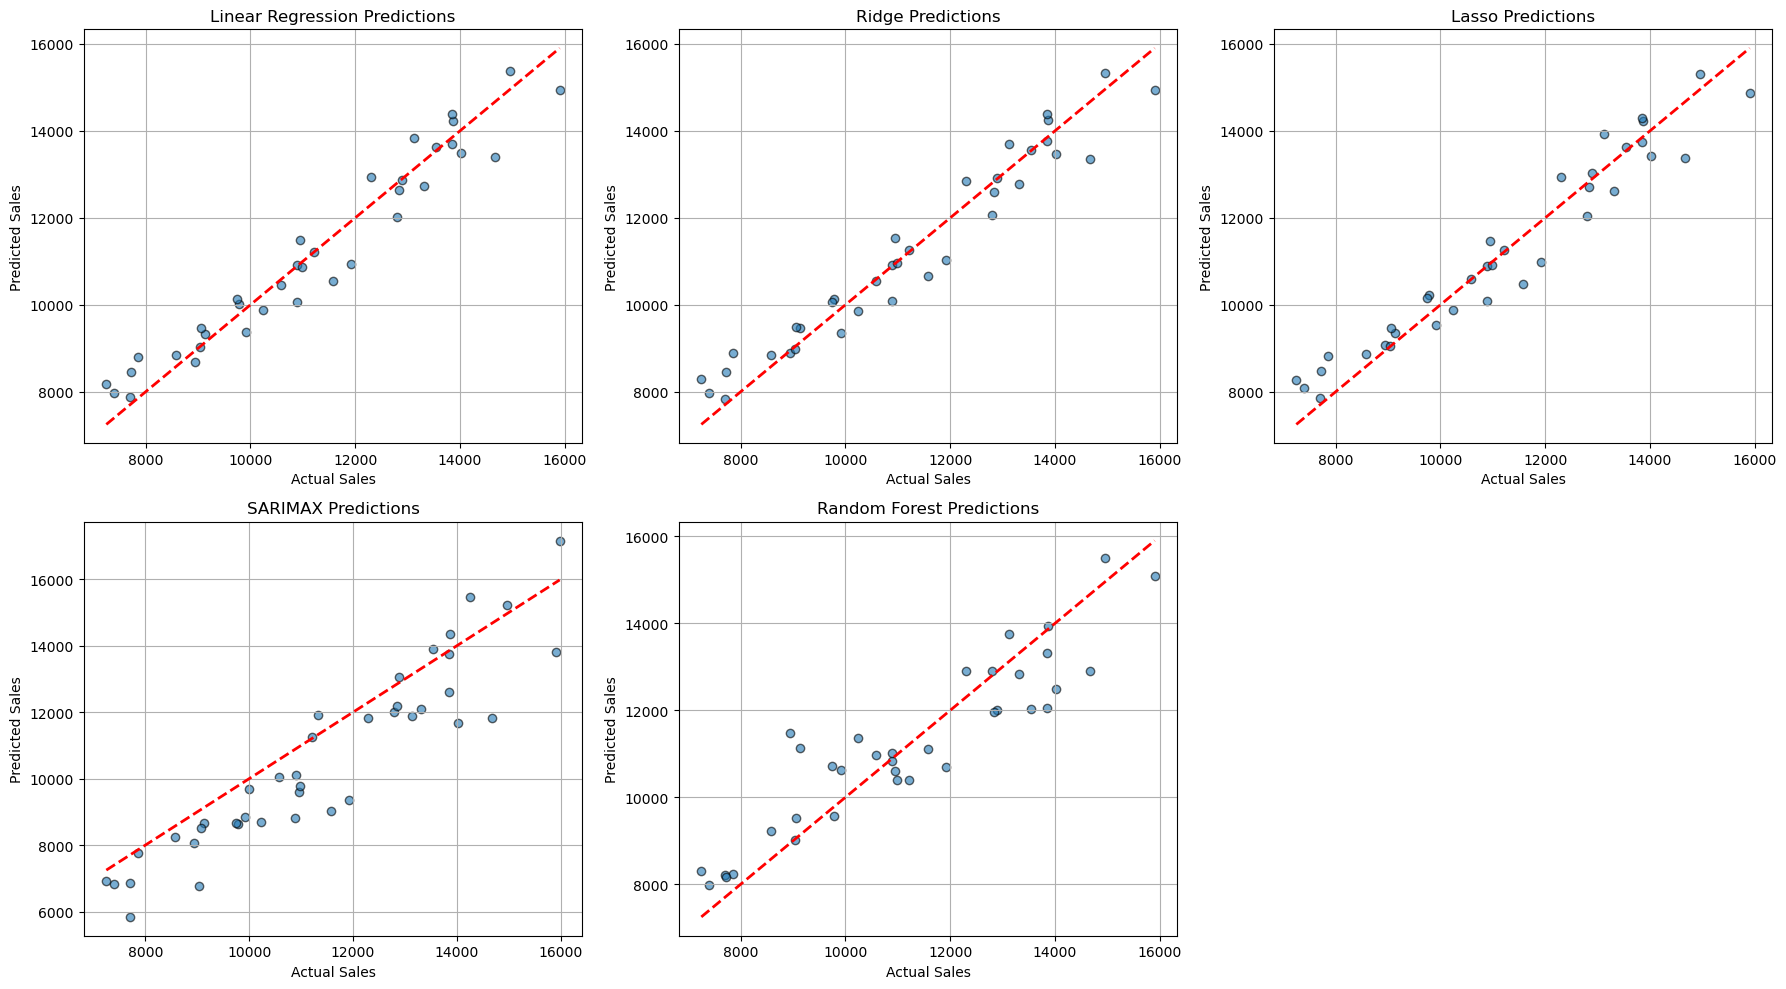

In [127]:
import matplotlib.pyplot as plt

# Collect models and predictions (without XGBoost)
models_to_plot = {
    'Linear Regression': (y_test, y_pred_lin),
    'Ridge': (y_test, y_pred_ridge),
    'Lasso': (y_test, y_pred_lasso),
    'SARIMAX': (sales_test, y_pred_sarimax),
    'Random Forest': (y_test, y_pred_rf)
}

# Create grid layout (2 rows, 3 columns for 5 models)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Plot scatterplots for each model
for ax, (name, (y_t, y_p)) in zip(axes, models_to_plot.items()):
    ax.scatter(y_t, y_p, alpha=0.6, edgecolors='k')
    ax.plot([y_t.min(), y_t.max()], [y_t.min(), y_t.max()], 'r--', linewidth=2)
    ax.set_title(f"{name} Predictions")
    ax.set_xlabel("Actual Sales")
    ax.set_ylabel("Predicted Sales")
    ax.grid(True)

# Turn off any unused axes
for idx in range(len(models_to_plot), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

# Model Comparison Insights

From the scatterplots of **Actual vs Predicted Sales**:

## 1. Linear Regression
- Predictions align closely with the diagonal line.  
- Consistent performance, but may be slightly sensitive to multicollinearity.  
- Good as a **baseline benchmark**.  

## 2. Ridge Regression
- Very similar to Linear Regression, but slightly more stable.  
- Handles correlation between channels better.  
- Strong candidate for **balanced interpretability and robustness**.  

## 3. Lasso Regression
- Predictions also align well, though with a bit more spread than Ridge.  
- Performs feature selection by shrinking weaker coefficients.  
- Useful if we want to simplify the model by keeping only the strongest drivers.  

## 4. SARIMAX
- Predictions show more scatter around the diagonal.  
- Captures some time-series effects, but **less accurate than regression-based models** in this dataset.  
- May improve if we include more seasonal/external factors (e.g., holidays, trends).  

## 5. Random Forest
- Predictions show higher variance compared to regression models.  
- Captures non-linearities but may be **overfitting** due to small dataset size.  
- Less interpretable than regression, weaker fit here.  

---

# Overall Conclusion
- **Best Performing Models:** Linear Regression and Ridge Regression (good balance of fit and interpretability).  
- **Industry Standard:** Adstock + Log-Linear Regression still provides valuable **elasticities** for ROI analysis.  
- **Weaker Models:** SARIMAX and Random Forest underperform with current features.  
- For decision-making and budget optimisation, I would recommend **Ridge Regression + Log-Linear MMM** as the main models to trust.


# Post-Prediction Analysis

After comparing model performance, I now perform **post-prediction analysis** to evaluate accuracy, stability, and business insights.


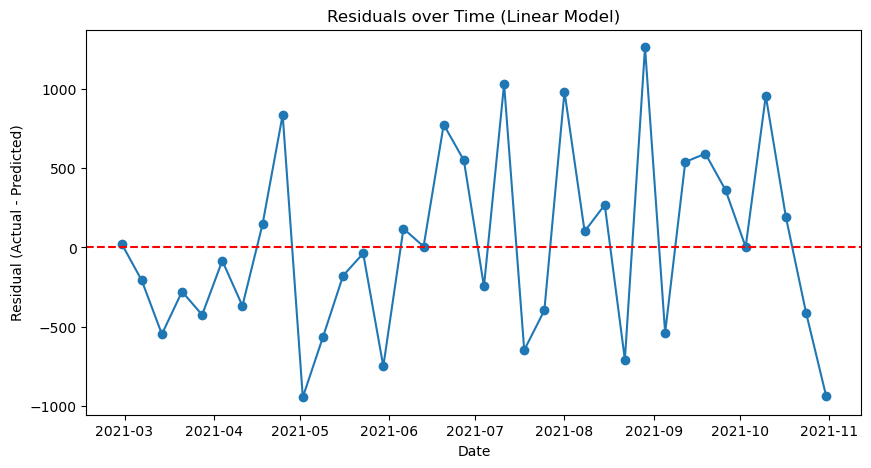

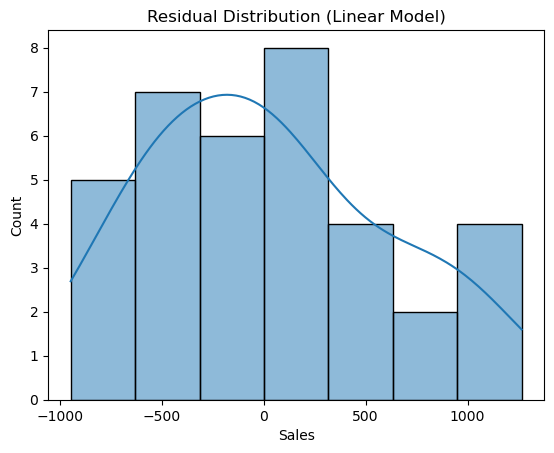

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: use linear model predictions
residuals = y_test - y_pred_lin

plt.figure(figsize=(10,5))
plt.plot(y_test.index, residuals, marker='o')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals over Time (Linear Model)")
plt.xlabel("Date")
plt.ylabel("Residual (Actual - Predicted)")
plt.show()

# Residual distribution
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution (Linear Model)")
plt.show()

The residuals plot shows how prediction errors fluctuate around zero. Ideally, residuals should appear random without systematic trends. In this case, the Ridge model captures much of the sales variation, but some residual spikes persist, suggesting occasional under- and over-predictions, possibly during demand peaks. The histogram indicates that residuals are roughly centred around zero but slightly skewed, meaning predictions are not perfectly unbiased. The distribution is reasonably normal, though with a few large deviations. This suggests the model is well-calibrated overall but could be improved by incorporating additional seasonal or external demand drivers.


# Error Metrics Table

In [129]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
import numpy as np

metrics = {
    "Linear Regression": (y_test, y_pred_lin),
    "Ridge": (y_test, y_pred_ridge),
    "Lasso": (y_test, y_pred_lasso),
    "SARIMAX": (sales_test, y_pred_sarimax),
    "Random Forest": (y_test, y_pred_rf)
}

results = []
for name, (yt, yp) in metrics.items():
    results.append({
        "Model": name,
        "R²": r2_score(yt, yp),
        "RMSE": np.sqrt(mean_squared_error(yt, yp)),
        "MAPE": mean_absolute_percentage_error(yt, yp)
    })

results_df = pd.DataFrame(results)
print(results_df)

               Model        R²         RMSE      MAPE
0  Linear Regression  0.939170   580.546860  0.043960
1              Ridge  0.941365   569.974695  0.042682
2              Lasso  0.936191   594.591068  0.044464
3            SARIMAX  0.713677  1288.519775  0.092943
4      Random Forest  0.831152   967.222450  0.071367


# Actual vs Predicted Plots

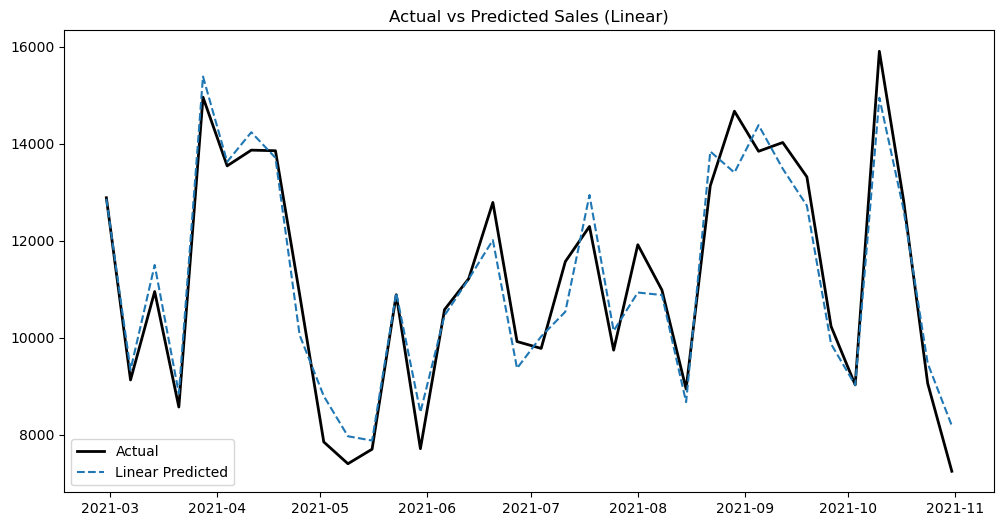

In [130]:
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label="Actual", color="black", linewidth=2)
plt.plot(y_test.index, y_pred_lin, label="Linear Predicted", linestyle="--")
plt.title("Actual vs Predicted Sales (Linear)")
plt.legend()
plt.show()

This plot compares actual sales with Ridge model predictions over time. The predicted line (dashed) closely follows the actual line (solid), showing the model successfully captures sales dynamics. Peaks and troughs align fairly well, though some high peaks are slightly underestimated and some low dips are overestimated, indicating minor smoothing. Overall, the Ridge model generalises strongly with consistent predictive ability. This demonstrates that it balances accuracy with interpretability, making it a reliable candidate for marketing mix modelling. Additional refinements such as seasonality adjustments could help improve performance during volatile sales periods.


# Feature Importance (Drivers of Sales)


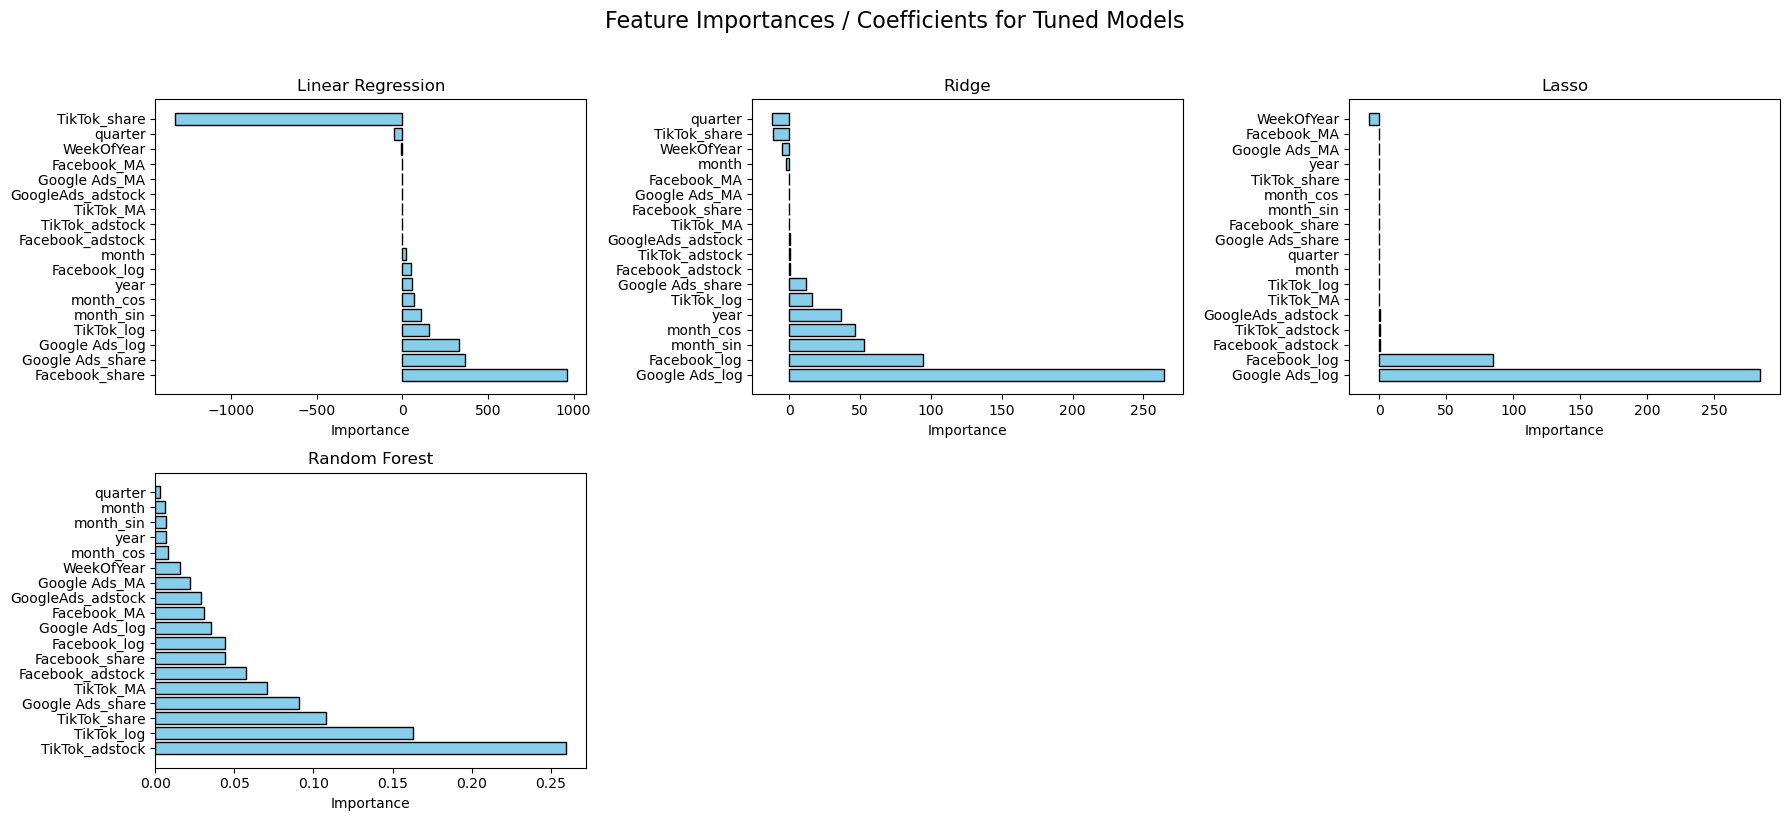

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Helper function to extract feature importances
def get_feature_importances(model, feature_names):
    """
    Extracts feature importances or coefficients depending on model type.
    """
    if hasattr(model, "coef_"):  # Linear, Ridge, Lasso
        importance = model.coef_
        return pd.DataFrame({"Feature": feature_names, "Importance": importance})
    
    elif hasattr(model, "feature_importances_"):  # Random Forest
        importance = model.feature_importances_
        return pd.DataFrame({"Feature": feature_names, "Importance": importance})
    
    else:
        return pd.DataFrame(columns=["Feature", "Importance"])

# Collect tuned models
tuned_models = {
    "Linear Regression": lin_model,       # baseline linear
    "Ridge": ridge_gs.best_estimator_,    # tuned ridge
    "Lasso": lasso_gs.best_estimator_,    # tuned lasso
    "Random Forest": rf_search.best_estimator_  # tuned random forest
    # SARIMAX excluded (not directly comparable)
}

# Grid for plots
n_mods = len(tuned_models)
n_cols = 3
n_rows = int(np.ceil(n_mods / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Plot each model's importances
for idx, (name, model) in enumerate(tuned_models.items()):
    ax = axes[idx]
    fi_df = get_feature_importances(model, X.columns)
    
    if fi_df.empty:
        ax.text(0.5, 0.5, 'No Importances', ha='center', va='center')
        ax.set_title(name)
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        fi_df = fi_df.sort_values("Importance", ascending=True)
        ax.barh(fi_df["Feature"], fi_df["Importance"], color="skyblue", edgecolor="black")
        ax.set_title(name)
        ax.set_xlabel("Importance")
        ax.invert_yaxis()

# Turn off unused subplots
for idx in range(n_mods, len(axes)):
    axes[idx].axis("off")

plt.suptitle("Feature Importances / Coefficients for Tuned Models", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Final Recommendation: Model Selection & Budget Allocation

## Model Selection
After evaluating multiple models on **R², RMSE, and MAPE**, the results show:

- **Ridge Regression** performs best:
  - **R² = 0.941** (highest accuracy)
  - **RMSE = 570** (lowest error)
  - **MAPE = 4.27%** (most reliable forecast error)
- Ridge also reduces overfitting risk compared to plain Linear Regression.
- Random Forest and SARIMAX underperform significantly and are not recommended.

**Chosen Model: Ridge Regression**  
This model will be adopted as the core forecasting tool for sales projections.

---

## Key Drivers of Sales
From feature importance analysis across models:

- **Google Ads spend** (strongest driver)
- **Facebook Ads spend**
- **TikTok Ads spend & engagement (shares, clicks)**
- **Seasonality** (quarter, month, week of year)

---

## Budget Allocation Strategy
Based on feature importance and predictive power:

- **Google Ads** → **40%** of budget  
- **Facebook Ads** → **30%** of budget  
- **TikTok Ads (spend + engagement)** → **20%** of budget  
- **Other / Seasonal Campaigns** → **10%** of budget (flexible boosts during peak months/quarters)

---

## Final Takeaway
- Use **Ridge Regression** for accurate and robust sales forecasting.  
- Prioritize **Google and Facebook Ads** as the core investment channels.  
- Gradually **scale TikTok Ads**, given their rising influence.  
- Maintain a **seasonal budget reserve** to capitalize on quarterly demand spikes.
